<a href="https://colab.research.google.com/github/fisherj1/Neural/blob/task4_1/Lesson4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from PIL import Image, ImageFilter
import numpy as np
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from scipy import signal
import tensorflow as tf

In [4]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, \
                                    Dense, \
                                    MaxPool2D,\
                                    Dropout, \
                                    Flatten, \
                                    BatchNormalization
from tensorflow.keras.datasets import mnist

In [5]:
%matplotlib inline
import seaborn as sns

In [6]:
from sklearn.metrics import confusion_matrix
import itertools

In [7]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [ ]:
response = requests.get("https://www.culture.ru/s/vopros/kremlin/images/tild3264-3233-4131-b836-623939356634__noroot.png")
img = Image.open(BytesIO(response.content))
# img = Image.open("image.jpg") # For local image
img.load()
img=img.resize((1258,1258))
img_color = img.convert("RGB")
data_color = np.asarray(img_color, dtype="int32")
img_gray = img.convert("LA")
data = np.asarray(img_gray, dtype="int32")
data = data.astype("float32")[:,:,0]/255
img.close()

In [ ]:
response = requests.get("https://www.culture.ru/s/vopros/kremlin/images/tild3264-3233-4131-b836-623939356634__noroot.png")
img = Image.open(BytesIO(response.content))
# img = Image.open("image.jpg") # For local image
img.load()
img=img.resize((1258,1258))
img_color = img.convert("RGB")
data_color = np.asarray(img_color, dtype="int32")
img_gray = img.convert("LA")
data = np.asarray(img_gray, dtype="int32")
data = data.astype("float32")[:,:,0]/255
img.close()
conv_kernels = list()
conv_kernels.append(np.array([[-1,0,1], [-1,0,1], [-1,0,1]]))
conv_kernels.append(np.array([[1,0,-1], [1,0,-1], [1,0,-1]]))

conv_kernels.append(np.array([[-1,-1,-1], [0,0,0], [1,1,1]]))
conv_kernels.append(np.array([[1,1,1], [0,0,0], [-1,-1,-1]]))

conv_kernels.append(np.array([[0,-1,-1], [1,0,-1], [1,1,0]]))
conv_kernels.append(np.array([[-1,-1,0], [-1,0,1], [0,1,1]]))

fig = plt.figure(figsize=(30,80))
fig.add_subplot(len(conv_kernels) + 1, 1, 1)
plt.imshow(data, cmap='gray')
for i in range(len(conv_kernels)):
    cdata = signal.convolve2d(data, conv_kernels[i], 'valid')
    fig.add_subplot(len(conv_kernels) + 1, 1, i+2)
    plt.imshow(cdata, cmap='gray')
plt.show()

In [8]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
# Reshape the images.
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)
input_shape = x_train[0].shape

11493376/11490434 [==============================] - 0s 0us/step


In [9]:
model = Sequential([
  Conv2D(32,kernel_size=(3,3), input_shape=input_shape, activation ='relu', padding='same'),
	Conv2D(32,kernel_size=(3,3), activation ='relu', padding='same'),
	MaxPool2D(pool_size=(2, 2)),
	

	Conv2D(64,kernel_size=(3,3), activation ='relu', padding = 'same'),
	Conv2D(64,kernel_size=(3,3), activation ='relu', padding='same'),
  MaxPool2D(pool_size=(2, 2)),
    
	Flatten(),
  Dense(128, activation=tf.nn.relu),
  Dropout(0.25),
  Dense(10, activation=tf.nn.softmax)])

In [10]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    validation_data=(x_test, y_test))

In [12]:
loss, acc = model.evaluate(x_train, y_train)
print("Loss = {}, accuracy = {}".format(loss, acc))

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0059 - accuracy: 0.9982
Loss = 0.005872716661542654, accuracy = 0.9981666803359985


In [13]:
loss, acc = model.evaluate(x_test, y_test)
print("Loss = {}, accuracy = {}".format(loss, acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.0261 - accuracy: 0.9937
Loss = 0.026136385276913643, accuracy = 0.9937000274658203


In [13]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(100, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [ ]:
history2 = model2.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

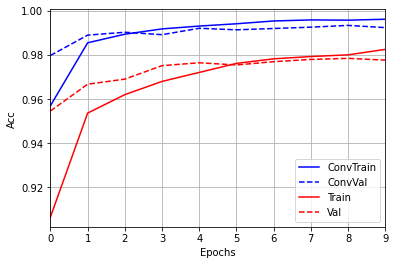

In [48]:
plt.xlabel('Epochs')
plt.ylabel("Acc")
plt.plot(history.epoch, history.history["accuracy"], color="blue", label='ConvTrain')
plt.plot(history.epoch, history.history['val_accuracy'], '--', label='ConvVal', color="blue")
plt.grid()
plt.plot(history2.epoch, history2.history["accuracy"], color="red", label='Train')
plt.plot(history2.epoch, history2.history['val_accuracy'], '--', label='Val', color="red")

plt.legend()
plt.xlim([0, max(history.epoch)])
plt.show()

In [ ]:
# Define numbers of generated data points and bins per axis.
N_numbers = 100000
N_bins = 100

# set random seed 
np.random.seed(0)

# Generate 2D normally distributed numbers.
x, y = np.random.multivariate_normal(
        mean=[0.0, 0.0],      # mean
        cov=[[1.0, 0.1],
             [0.4, 0.25]],    # covariance matrix
        size=N_numbers
        ).T                   # transpose to get columns


# Construct 2D histogram from data using the 'plasma' colormap
plt.hist2d(x, y, bins=N_bins, normed=False, cmap='plasma')

# Plot a colorbar with label.
cb = plt.colorbar()
cb.set_label('Number of entries')

# Add title and labels to plot.
plt.title('Heatmap of 2D normally distributed data points')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.imshow(a, cmap='hot', interpolation='nearest')
# Show the plot.
plt.show()

In [187]:
def visualize_conv_layer(layer_name):
  
  layer_output=model.get_layer(layer_name).output

  intermediate_model=tf.keras.models.Model(inputs=model.input,outputs=layer_output)

  intermediate_prediction=intermediate_model.predict(x_train[1].reshape(1,28,28,1))
  
  row_size=2
  col_size=16
  
  img_index=0
  #heatmap = plt.pcolor(intermediate_prediction)
  print(np.shape(intermediate_prediction))
  
  fig,ax=plt.subplots(row_size,col_size,figsize=(20,2))
  plt.subplots_adjust(wspace=0, hspace=0)
  #fig.axes()[0].get_xaxis().set_visible([])
  #fig.axes().get_yaxis().set_visible([])
  for row in range(0,row_size):
    for col in range(0,col_size):
      ax[row][col].pcolor(intermediate_prediction[0, :, :, img_index])
      ax[row][col].get_yaxis().set_visible(False)
      ax[row][col].get_xaxis().set_visible(False)
      img_index=img_index+1
  fig.suptitle(layer_name, fontsize=16, color="white")

(1, 28, 28, 32)
(1, 28, 28, 32)
(1, 14, 14, 32)
(1, 14, 14, 64)
(1, 14, 14, 64)
(1, 7, 7, 64)


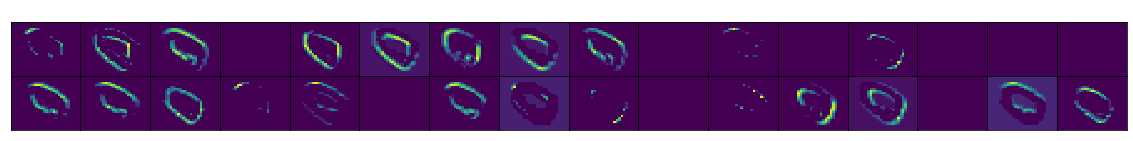

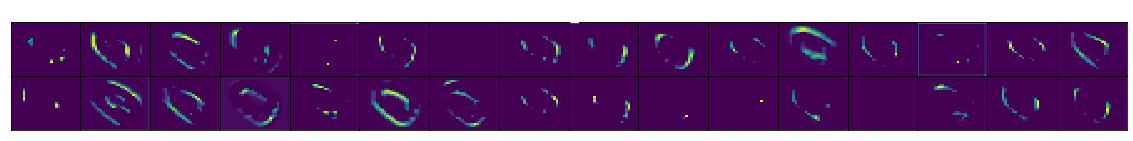

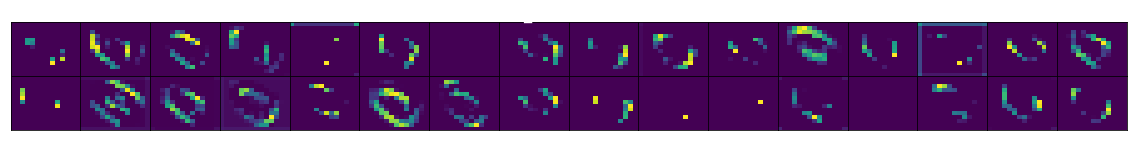

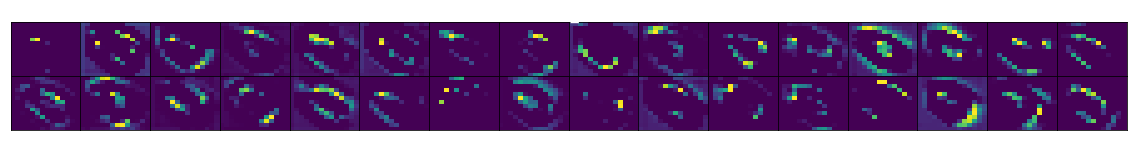

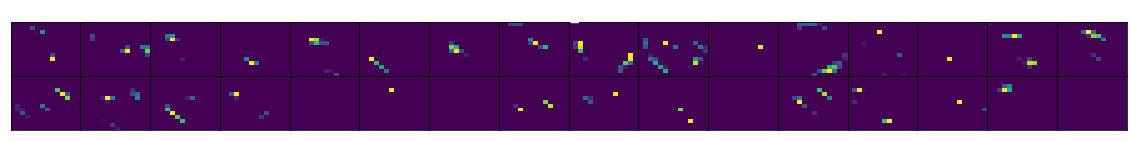

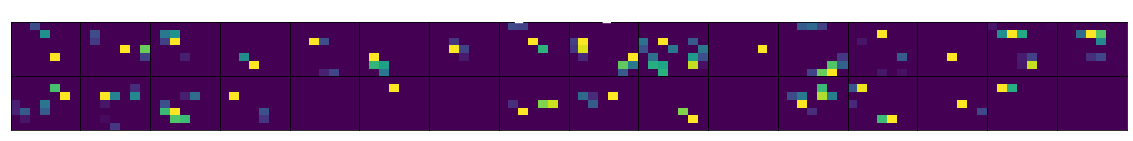

In [188]:
for i in range(6):
  visualize_conv_layer(model.get_layer(index=i).name)

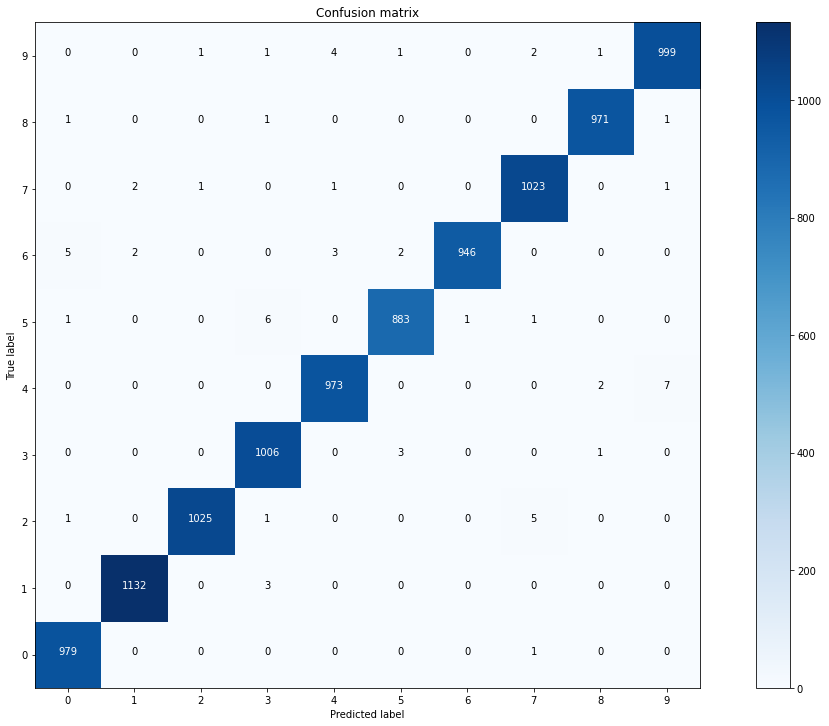

In [ ]:
%matplotlib inline

def plot_confusion_matrix(cm ,classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be appplied by setting `normalize=True`.
    """
    plt.figure(figsize=(16,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.xlim((-0.5, len(classes)-0.5))
    plt.ylim((-0.5, len(classes)-0.5))
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i,j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
X_val = x_test
Y_true = y_test
Y_pred = model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred, axis = 1)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
plot_confusion_matrix(confusion_mtx, classes=range(10))

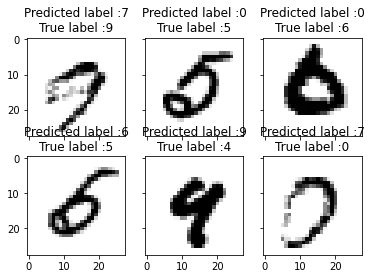

In [ ]:
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)), cmap="gray_r")
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)